# Activation Function

## What is an Activation Function?

Biological neural networks inspired the development of artificial neural networks (ANNs). While ANNs are not an exact representation of how the brain works, understanding the relevance of an activation function in a biological neural network provides context for its use in artificial neural networks.

A typical neuron in a biological neural network has a physical structure consisting of a cell body, an axon that sends messages to other neurons, and dendrites that receive signals or information from other neurons.

![Biological neural network](../../img/AF005.jpg)
*Figure 1: Biological neural network*

In Figure 1, the red circle indicates the region where two neurons communicate. The neuron receives signals from other neurons through the dendrites. The strength of the incoming signal is multiplied by the synaptic weights associated with a dendrite. These signals are accumulated in the cell body. If the strength of the resulting signal is above a certain threshold, the neuron passes the message to the axon. Otherwise, the signal is terminated by the neuron and does not propagate further.

The activation function plays a crucial role in deciding whether to pass a signal. In the case of a biological neural network, a simple step function with a threshold determines this decision. When learning or unlearning occurs, the threshold and synaptic weights of some neurons change, creating new connections among neurons and allowing the brain to learn new things.

Now, let's explore the same concept using an artificial neuron.

![Artificial neural network](../../img/AN006.jpg)
*Figure 2: Artificial neural network*

In Figure 2, $(x_1, \cdots , x_n)$ is the signal vector multiplied by the weights $(w_1, w_2, \cdots, w_n)$. This is followed by accumulation (summation + addition of bias $b$). Finally, an activation function $f$ is applied to this sum.

Note that the weights $(w_1, w_2, \cdots, w_n)$ and the bias $b$ transform the input signal linearly. The activation function $f$, however, transforms the signal non-linearly, allowing the neural network to learn arbitrarily complex transformations between the input and the output.

Over the years, various functions have been used, and finding a proper activation function that enhances neural network learning remains an active area of research.

## How does the network learn?

Understanding how a neural network learns is essential. Let's assume the desired output is $y$, and the network produces an output $y'$. The difference between the predicted and desired output $(y - y')$ is converted into a metric known as the loss function $J$. The loss is high when the neural network makes many mistakes and low when it makes fewer mistakes. The goal of the training process is to find weights and biases that minimize the loss function over the training set.

In Figure 3, the loss function is shaped like a bowl. At any point in the training process, the partial derivatives of the loss function with respect to the weights are equivalent to the slope of the bowl at that location. By moving in the direction predicted by the partial derivatives, we can reach the bottom of the bowl and minimize the loss function. This idea is called **gradient descent**.

![Gradient Descent Surface](../../img/AN007.png)
*Figure 3: Gradient Descent Surface*

In artificial neural networks, weights are updated using a method called backpropagation. The partial derivatives of the loss function with respect to the weights are used for weight updates. The error is backpropagated in the network using derivatives in an iterative manner. After many iterations, the loss reaches a minimum value, and the derivative of the loss becomes zero.

## Types of Activation Functions

### Linear Activation Function

The linear activation function is a simple linear function of the form $f(x) = x$. In essence, the input passes to the output without any modification.

![Linear Activation Function](../../img/AN008.png)

### Non-Linear Activation Functions

Non-linear activation functions are employed to handle data that is not linearly separable, and they are among the most commonly used activation functions. A non-linear equation dictates the mapping from inputs to outputs. Examples of various non-linear activation functions include:

- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Parametric ReLU
- Swish, etc.

All these activation functions will be discussed in detail.

![Non-Linear Activation Function](../../img/AN009.png)

### Why do we need a Non-linear AF?

Neural networks are designed to implement complex functions, and non-linear activation functions empower them to approximate arbitrarily complex functions. Without the non-linearity introduced by the activation function, multiple layers of a neural network are equivalent to a single-layer neural network.

Let's consider a simple example to illustrate why non-linearity is essential. The XOR gate is a classic example. In the graphical representation of the XOR gate shown in Figure XOR Problem, two classes are represented by a cross and a circle. The output is 0 for identical features $X_1$ and $X_2$ (red crosses for (0,0) and (1,1)), and the output is 1 for different features (blue circles for (0,1) and (1,0)).

![XOR Problem](../../img/AN010.png)

As seen in the XOR example, the data points are not linearly separable. In other words, a straight line cannot be drawn to separate the blue circles from the red crosses. Therefore, a non-linear decision boundary is needed.

The activation function is crucial for constraining the output of the neural network within certain bounds. The output of a neuron $\sum^n_i w_i x_i + b$ can potentially take on very large values. If this output is fed to the next layer neuron without modification, it can result in even larger numbers, making the computational process intractable. One of the tasks of the activation function is to map the output of a neuron to a bounded range (e.g., between 0 and 1).

With this background, we are ready to delve into different types of activation functions.

## Types of Non-Linear Activation Functions

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt

# #======= set default plotting properties =======
# mpl.rcParams['lines.linewidth'] = 1
# mpl.rcParams['font.size'] = 16
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.sans-serif'] = 'Computer Modern Roman'
# mpl.rcParams['lines.color'] = 'b'
# plt.rcParams['figure.figsize'] = 7, 4.5 # default figure size

### Binary step function

(-8.799499999999982, 8.789499999999641, -0.05, 1.05)

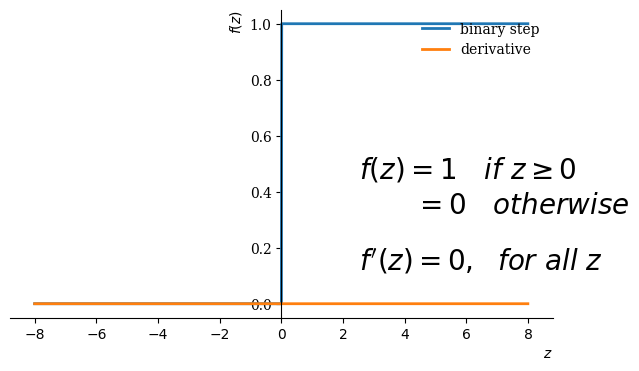

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def step(x):
    length = len(x)
    t = x.copy()
    ds = x.copy()
    for i in np.arange(length):
        if x[i]<0:
            t[i] = 0
            ds[i] = 0
        else:
            t[i] = 1
            ds[i] = 0 
    return t,ds

x=np.arange(-8,8,0.01)
# step(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(7, 4))
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,step(x)[0], linewidth=2, label="binary step")
ax.plot(x,step(x)[1],  linewidth=2, label="derivative")
plt.xlim([-8, +8])
plt.ylim([-0.5, 1.1])
# plt.text(-8, 0.8, r'$f(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$',fontsize=20)
plt.text(2.5, 0.45, r'$f(z) = 1~~~if~ z\geq 0$',fontsize=20)
plt.text(4.3, 0.32, r'$=0~~~{otherwise}$',fontsize=20)
plt.text(2.5, 0.12, r'$f^\prime(z) = 0,~~{for}~all~z$',fontsize=20)

plt.ylabel(r'$f(z)$',horizontalalignment='right',y=1.0)
plt.xlabel(r'$z$',horizontalalignment='right',x=1)
ax.legend(loc="upper right", frameon=False)
plt.axis('tight')
# plt.savefig('BinaryStep.pdf')

$$ x = 5$$





### Sigmoid function

It is also known as the Logistic Activation Function. The sigmoid function squashes a real-valued number into a range between 0 and 1, commonly used in the output layer for predicting probabilities. Mathematically, it is represented as:

$f(x) = \text{sigmoid}(x) = \frac{1}{1 + e^{-x}}$

The sigmoid function, though widely used in machine learning introductory materials, has drawbacks~[1]. Its derivative, denoted as $f'(x)$, is given by $f(x)(1 - f(x))$. Despite its ease of calculation, the sigmoid function can cause the network to lose knowledge during training due to the vanishing gradient problem.

![Sigmoid function and its derivative](../../img/AF001.png)

The three major drawbacks of sigmoid are:

- **Vanishing gradients:** The sigmoid function is flat near 0 and 1, leading to gradients near 0 during backpropagation. This results in the vanishing gradient problem.
- **Not zero-centered:** Sigmoid outputs are not zero-centered.
- **Computationally expensive:** The $\exp()$ function is computationally expensive compared to other non-linear activation functions.

### Tanh Activation Function

The tanh activation function addresses the zero-centered problem in sigmoid. It is also known as the hyperbolic tangent activation function. Tanh squashes a real-valued number into a range between -1 and 1. Unlike sigmoid, tanh outputs are zero-centered. Mathematically, it is represented as:

$f(x) = \tanh(x)$

The tanh function suffers from the vanishing gradient problem similar to sigmoid.

![Tanh activation function and its derivative](../../img/AN011.png)

To address the vanishing gradient problem, the rectified linear unit (ReLU) is a widely used non-linear activation function and is discussed next.

### Rectified Linear Units (ReLU)

Instead of sigmoids and tanh, most recent deep learning networks use rectified linear units (ReLUs) for the hidden layers. A rectified linear unit has an output of 0 if the input is less than 0 and the raw output otherwise. Mathematically, it is given by the expression:

$$f(x) = \max(x, 0)$$

ReLU activations are simple and efficient, and their machinery is more akin to a real neuron in the human body. The derivative of ReLU is straightforward; when the input is positive, the derivative is $1$, avoiding the vanishing gradient problem seen in the sigmoid function.

![ReLU activation function and its derivative](../../img/AF013.png)

ReLU makes the network converge faster and is computationally efficient due to simple thresholding. However, it has some drawbacks:

- **Not zero-centered:** Outputs are not zero-centered, similar to the sigmoid activation function.
- **Potential neuron death:** ReLU units can become inactive (dead) during training, causing the gradient to be $0$.

Research has shown that ReLUs result in faster training for large networks, but they can be fragile, leading to the "dying ReLU" problem. To address the vanishing gradient issue, Leaky ReLU was introduced.

### Leaky ReLU

Leaky ReLU attempts to mitigate the dying ReLU problem by introducing a small positive slope for \(x < 0\). The function is defined as:

$$f(x) = \max(0.1x, x)$$

While leaky ReLU somewhat resolves the dying ReLU problem, it has inconsistencies. An extension to leaky ReLU is Parametric ReLU.

### Parametric ReLU

Parametric ReLU (PReLU) introduces a hyperparameter \(\alpha\), making the slope in the negative region learnable. The function is given by:

$$f(x) = \max(\alpha, x)$$

The arbitrary hyperparameter \(\alpha\) is learned during backpropagation, allowing neurons to choose the best slope in the negative region.

### SWISH

SWISH, also known as a self-gated activation function, was recently introduced by researchers at Google. Mathematically, it is represented as:

$$\sigma(x) = \frac{x}{1 + e^{-x}}$$

According to the paper, the SWISH activation function performs better than ReLU.

![SWISH activation function](../../img/AF015.png)


## Softmax

While the sigmoid function is suitable for binary classification problems, it is not well-suited for handling multiple classes. For classification problems involving more than two classes, the softmax function is commonly used.

![Softmax calculation](../../img/AF002.png)

The softmax function squashes the outputs of each unit to be between 0 and 1, similar to the sigmoid function. However, it also normalizes the outputs by dividing each output by the sum of all outputs, ensuring that the total sum is equal to 1. This normalization produces a probability distribution over the classes.

Mathematically, the softmax function is defined as follows, where $z$ is a vector of inputs to the output layer, and $j$ indexes the output units:

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$$

Consider a scenario where a neural network is trained to recognize and classify handwritten digits from images, with ten output units corresponding to digits 0 to 9. If the network is fed an image of the digit 4, the output unit corresponding to digit 4 would be activated.

![Digit four from MNIST dataset](../../img/AF003.png)

The softmax function is crucial for scenarios with multiple classes. In the example of digit recognition, the softmax output for an image of the digit 4 might look like the following:

![Softmax output for digit four](../../img/AF004.png)

The softmax function provides a probability distribution, indicating the likelihood of each class. In this case, there is a high probability of being digit 4, but there are also non-zero probabilities for other digits, reflecting some similarity.

Softmax is widely used in classification tasks with multiple classes, such as object recognition in computer vision, where there are numerous possible objects.



